In [116]:
#importing some of the important libraries
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer


In [117]:
#loading the dataset
file_data=pd.read_csv(r"C:\Users\nidhi\Downloads\twitter train data.csv",index_col=0)

In [118]:
file_test_data=pd.read_csv(r"C:\Users\nidhi\Downloads\twitter test data project.csv",index_col=0)

In [119]:
#knowing the shape of the dataset
file_data.shape,file_test_data.shape

((10980, 11), (3660, 10))

In [120]:
file_data.describe()# knowing the numerical info about the dataset

,retweet_count
count,10980.000000
mean,0.080965
std,0.740303
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,44.000000


In [121]:
file_test_data.describe()

,retweet_count
count,3660.000000
mean,0.087705
std,0.762048
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,32.000000


In [122]:
file_data.dtypes#knowing the type of features in the dataset

airline_sentiment         object
airline                   object
airline_sentiment_gold    object
name                      object
negativereason_gold       object
retweet_count              int64
text                      object
tweet_coord               object
tweet_created             object
tweet_location            object
user_timezone             object
dtype: object

In [123]:
file_test_data.dtypes

airline                   object
airline_sentiment_gold    object
name                      object
negativereason_gold       object
retweet_count              int64
text                      object
tweet_coord               object
tweet_created             object
tweet_location            object
user_timezone             object
dtype: object

In [124]:
file_data.info()# knowing the basic info about the features of the dataset

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10980 entries, 5.679e+17 to 5.68929e+17
Data columns (total 11 columns):
airline_sentiment         10980 non-null object
airline                   10980 non-null object
airline_sentiment_gold    31 non-null object
name                      10980 non-null object
negativereason_gold       24 non-null object
retweet_count             10980 non-null int64
text                      10980 non-null object
tweet_coord               776 non-null object
tweet_created             10980 non-null object
tweet_location            7430 non-null object
user_timezone             7403 non-null object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


In [125]:
file_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3660 entries, 5.69682e+17 to 5.69342e+17
Data columns (total 10 columns):
airline                   3660 non-null object
airline_sentiment_gold    9 non-null object
name                      3660 non-null object
negativereason_gold       8 non-null object
retweet_count             3660 non-null int64
text                      3660 non-null object
tweet_coord               243 non-null object
tweet_created             3660 non-null object
tweet_location            2477 non-null object
user_timezone             2417 non-null object
dtypes: int64(1), object(9)
memory usage: 314.5+ KB


In [126]:
file_data.isnull().sum()/file_data.shape[0]#knowing the ratio of the null values in the dataset in each column 

airline_sentiment         0.000000
airline                   0.000000
airline_sentiment_gold    0.997177
name                      0.000000
negativereason_gold       0.997814
retweet_count             0.000000
text                      0.000000
tweet_coord               0.929326
tweet_created             0.000000
tweet_location            0.323315
user_timezone             0.325774
dtype: float64

In [127]:
file_test_data.isnull().sum()/file_test_data.shape[0]

airline                   0.000000
airline_sentiment_gold    0.997541
name                      0.000000
negativereason_gold       0.997814
retweet_count             0.000000
text                      0.000000
tweet_coord               0.933607
tweet_created             0.000000
tweet_location            0.323224
user_timezone             0.339617
dtype: float64

In [128]:
file_data.head()

,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,
5.679000e+17,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,17-02-2015 20:16,Washington D.C.,Atlantic Time (Canada)
5.699890e+17,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,23-02-2015 14:36,"Indianapolis, Indiana; USA",Central Time (US & Canada)
5.680890e+17,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,18-02-2015 08:46,Illinois,Central Time (US & Canada)
5.689280e+17,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,20-02-2015 16:20,NaN,Atlantic Time (Canada)
5.685940e+17,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,19-02-2015 18:13,NaN,Eastern Time (US & Canada)


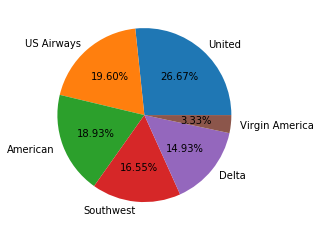

In [129]:
#Exploration of Data 
#here we draw the pie chart of the proportion of the people giving tweets to various airlines.
#we saw that people tweeted more about United Airlines
ans=file_data["airline"].value_counts()
x=ans.index
y=ans.values
plt.pie(y,labels=x,autopct="%.2f%%")
plt.show()


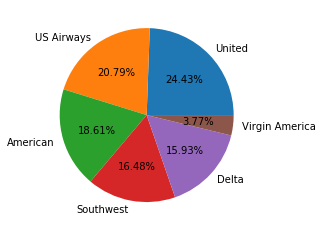

In [130]:
ans=file_test_data["airline"].value_counts()
x=ans.index
y=ans.values
plt.pie(y,labels=x,autopct="%.2f%%")
plt.show()

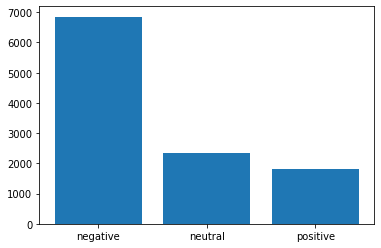

In [131]:
#After exploring the data we came to know that the number of negative tweets were very high and number of positive tweets were very low.
ans1=file_data["airline_sentiment"].value_counts()
x=ans1.index
y=ans1.values
plt.bar(x,y)
plt.show()

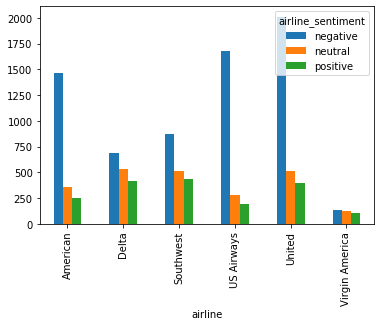

In [132]:
airline_=file_data.groupby(["airline","airline_sentiment"]).airline_sentiment.count().unstack()
airline_.plot(kind="bar")

 ### we here see airline wise number of  positive ,negative and neutral tweets .We also see that all the airlines have negative comments more .

# Data Cleaning

### Now we have explored the data and have gathered some relevant information of the number of the tweets of each respective airlines.Now our aim is to clean the tweets .Since the tweets consists of many slang words,emojis,punctuation marks,special characters and stopwords so we will clean the tweets 

In [133]:
file_data.reset_index('tweet_id', inplace=True)


In [134]:
file_test_data.reset_index('tweet_id', inplace=True)

In [135]:
file_data.columns
file_data.reset_index(drop=True, inplace=True)

In [136]:
file_test_data.columns

Index(['tweet_id', 'airline', 'airline_sentiment_gold', 'name',
       'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [137]:
file_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [138]:
target=file_data.iloc[:,1].values
features=file_data.iloc[:,7].values

In [139]:
test_twitter_data=file_test_data.iloc[:,6].values

In [140]:
test_twitter_data

array(["@AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?",
       '@AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.',
       "@SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow.",
       ...,
       'Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX',
       '@AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:)',
       '@united the lounge tells us they have no pillows for my grandma as one of the ladies opens the closet and I see 2 right there. #unitedlies'],
      dtype=object)

In [141]:
target


array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [142]:
features

array(['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
       '@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
       '@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
       ..., '@usairways the. Worst. Ever. #dca #customerservice',
       '@nrhodes85: look! Another apology. DO NOT FLY @USAirways',
       '@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.'],
      dtype=object)

In [143]:
# now we have to clean the tweets and for cleaning the tweets we have to remove stopwords and all punctuation mark
words=stopwords.words("English")
stop_words=set(words)

In [144]:
import string
import re

In [145]:
a=set(string.punctuation)
stop_words.update(a)

In [146]:
processed_features=[]
for tweet in features:
    tweet_change=processing_tweets(tweet)
    processed_features.append(tweet_change)
    
    

In [147]:
#preprocessing the tweets

    
def  processing_tweets(tweet):
    #converting all the tweets to lowercase
    tweet=tweet.lower()
    #removing all the urls from the tweet
    tweet = re.sub(r'http\s+|www\s+|https\s+', '', tweet, flags=re.MULTILINE)
    #removing # and @ from the tweets
    tweet=re.sub(r'\@\w+|\#','',tweet,flags=re.MULTILINE)
    #first we will tokenize the tweets
    tweets_token=word_tokenize(tweet)
    filtered_words=[w for w in tweets_token if w not in stop_words]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos="a") for w in filtered_words]
    
    
    return " ".join(lemma_words)

    
    

In [148]:
#importing tfIDF vectorizer
vectorizer=TfidfVectorizer(max_features=3000,ngram_range=(1, 2),max_df=0.8,min_df=6)

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(processed_features,target)

In [151]:
features_process=vectorizer.fit_transform(x_train)
test_data=vectorizer.transform(x_test)

In [152]:
test_tfid_data=vectorizer.transform(test_twitter_data)

In [153]:
vectorizer.get_feature_names()

['00',
 '000',
 '10',
 '10 minutes',
 '100',
 '11',
 '12',
 '13',
 '130',
 '14',
 '15',
 '15 minutes',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1hr',
 '1k',
 '1st',
 '1st class',
 '20',
 '20 min',
 '20 mins',
 '20 minutes',
 '200',
 '2015',
 '21',
 '22',
 '23',
 '24',
 '24 hours',
 '24hrs',
 '25',
 '25 min',
 '26',
 '27',
 '28',
 '2day',
 '2days',
 '2hrs',
 '2nd',
 '2nd time',
 '2x',
 '30',
 '30 min',
 '30 mins',
 '30 minutes',
 '300',
 '30am',
 '30pm',
 '32',
 '35',
 '3am',
 '3hrs',
 '3rd',
 '40',
 '40 min',
 '40 minutes',
 '400',
 '45',
 '45 min',
 '45 mins',
 '45 minutes',
 '48',
 '50',
 '50 voucher',
 '500',
 '55',
 '59',
 '5hrs',
 '60',
 '700',
 '728',
 '75',
 '787',
 '7am',
 '800',
 '800 number',
 '90',
 '90 minutes',
 'a320',
 'aa',
 'abc',
 'able',
 'able get',
 'absolute',
 'absolutely',
 'absurd',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accommodate',
 'according',
 'account',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'additional',
 'address'

In [154]:
from sklearn.svm import SVC

In [155]:
classifier=SVC()
classifier.fit(features_process,y_train)

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
random_class=RandomForestClassifier(n_estimators=200,random_state=0)

In [164]:
random_class.fit(features_process,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [165]:
random_class.score(test_data,y_test)

0.7406193078324226

In [156]:
classifier.score(test_data,y_test)

0.6145719489981785

In [157]:
y_pred=classifier.predict(test_data)

In [166]:
random_class.predict(test_data)

array(['negative', 'negative', 'neutral', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [158]:
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [159]:
answer=classifier.predict(test_tfid_data)

In [168]:
random_answer1=random_class.predict(test_tfid_data)

In [160]:
answer

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [169]:
random_answer1

array(['negative', 'negative', 'negative', ..., 'neutral', 'positive',
       'negative'], dtype=object)

In [161]:
np.savetxt(fname="answer._twitter2.csv", X=answer, delimiter=',', fmt="%s")

In [170]:
np.savetxt(fname="answer._twitter2_random_forest.csv", X=random_answer1, delimiter=',', fmt="%s")